In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [3]:
df=pd.read_excel('/content/north_east_plains.xlsx')

In [4]:
df.head()

,Region,Area,Timely sown,Seed,Grain appearance,Hectolitre weight,Protein content,Sedimentation value,Phenol test,Fe content,Zn content
0,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,HD2733 ©,6.0,79.0,12.0,40.0,6.5,40.1,34.8
1,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,HD3249 (C),6.2,78.3,12.3,58.8,7.5,45.3,33.2
2,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,DBW187 (C),5.8,77.6,12.6,59.2,8.5,42.5,34.2
3,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,DBW39 (C),5.6,80.3,11.5,44.6,2.0,44.4,43.9
4,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,HD2967 (C),5.8,79.2,12.3,49.6,6.5,40.0,35.2


In [5]:
df.isnull().sum()

Region                 0
Area                   0
Timely sown            0
Seed                   0
Grain appearance       0
Hectolitre weight      0
Protein content        0
Sedimentation value    0
Phenol test            0
Fe content             0
Zn content             0
dtype: int64

In [6]:
df.shape

(140, 11)

In [7]:
df.iloc[:,9:11]

,Fe content,Zn content
0,40.1,34.8
1,45.3,33.2
2,42.5,34.2
3,44.4,43.9
4,40.0,35.2
...,...,...
135,41.5,34.4
136,39.8,29.7
137,38.4,30.6
138,37.3,36.1


In [8]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,9:11])

StandardScaler()

In [9]:
scaled_data = scaler.transform(df.iloc[:,9:11])

In [10]:
scaled_data.shape

(140, 2)

In [11]:
df_scale=pd.DataFrame(scaled_data)

In [12]:
df_scale.head()

,0,1
0,0.510821,-0.240183
1,0.964663,-0.549918
2,0.720286,-0.356333
3,0.886113,1.521434
4,0.502093,-0.162749


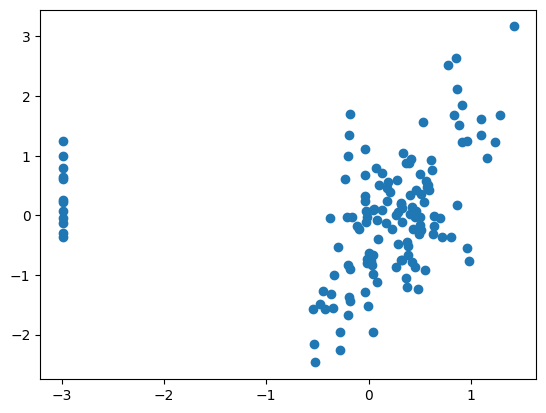

In [13]:
plt.scatter(df_scale[0],df_scale[1])
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [15]:
k_rng = range(1,14)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scale[[0,1]])
    sse.append( km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

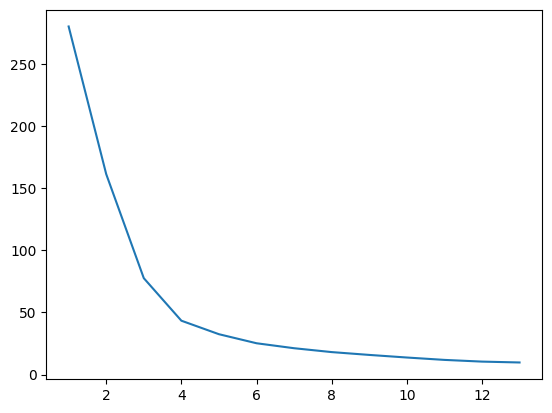

In [16]:
plt.plot(k_rng,sse)

In [17]:
kvalue=range(2,12)
sil=[]
for k in kvalue:
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(df_scale[[0,1]])
    score=metrics.silhouette_score(df_scale[[0,1]], labels)
    sil.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

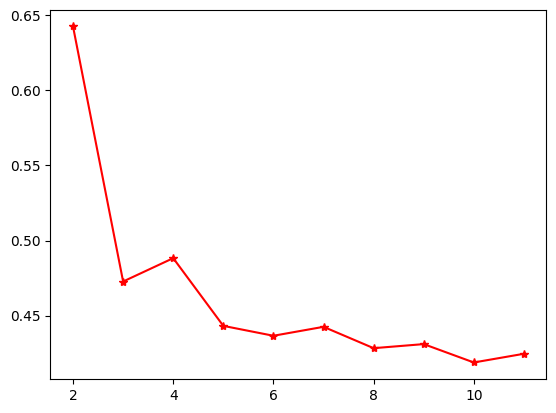

In [18]:
plt.plot(kvalue,sil,marker='*',color='red')
plt.show()

In [19]:
km = KMeans(n_clusters=2)
c = km.fit_predict(df_scale)
c

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [20]:
df_scale['cluster'] = c
df_scale.head()

,0,1,cluster
0,0.510821,-0.240183,0
1,0.964663,-0.549918,0
2,0.720286,-0.356333,0
3,0.886113,1.521434,0
4,0.502093,-0.162749,0


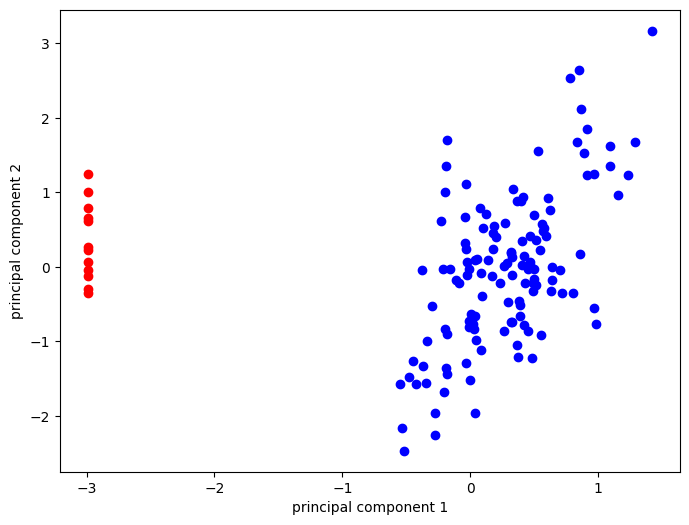

In [21]:
plt.figure(figsize=(8,6))
dfc1 = df_scale[df_scale.cluster==0]
dfc2 = df_scale[df_scale.cluster==1]
plt.scatter(dfc1[0],dfc1[1],color='blue')
plt.scatter(dfc2[0],dfc2[1],color='red')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [22]:
df['cluster'] = c
df.head()

,Region,Area,Timely sown,Seed,Grain appearance,Hectolitre weight,Protein content,Sedimentation value,Phenol test,Fe content,Zn content,cluster
0,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,HD2733 ©,6.0,79.0,12.0,40.0,6.5,40.1,34.8,0
1,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,HD3249 (C),6.2,78.3,12.3,58.8,7.5,45.3,33.2,0
2,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,DBW187 (C),5.8,77.6,12.6,59.2,8.5,42.5,34.2,0
3,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,DBW39 (C),5.6,80.3,11.5,44.6,2.0,44.4,43.9,0
4,North East Plains Zone (NEPZ),Kanpur,Irrigated Timely Sown,HD2967 (C),5.8,79.2,12.3,49.6,6.5,40.0,35.2,0


In [23]:
import numpy as np

In [24]:
mean_val=np.mean(dfc1)
mean_val

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0          0.280218
1         -0.031475
cluster    0.000000
dtype: float64

In [25]:
mean_val=np.mean(dfc2)
mean_val

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0         -2.988995
1          0.335730
cluster    1.000000
dtype: float64

In [27]:
df.to_csv('NEP_with_cluster.csv')